# Import churn dataset

In [3]:
# Import libraries
import pandas as pd
import numpy as np

In [4]:
# Load csv file as a DataFrame
df = pd.read_csv(r'/content/1730285168-TelecomCustomerChurn.csv')

In [5]:
# Preview the data
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


# EDA

In [6]:
# Check for missing values and view object types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Description:** The telco data seems like it doesn't have any null values. However, we can see that the TotalChares column should be numerical since it holds the value of prices.

In [7]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
customerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Description:** From here here, we can see that some values from the TotalCharges is missing after the data type conversion. Since the amount is insignificant, we can safely drop the rows with missing TotalCharges value. We can also remove the customerID columns since it is less important when we're analyzing the correlation between variables.

In [8]:
# Drop null rows
df.dropna(inplace=True)

In [9]:
# Remove the customerID column (the first column)
df_x = df.iloc[:,1:]

In [10]:
# Convert the predictor variable into binary
df_x['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_x['Churn'].replace(to_replace='No',  value=0, inplace=True)

/tmp/ipython-input-1976435534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_x['Churn'].replace(to_replace='Yes', value=1, inplace=True)
/tmp/ipython-input-1976435534.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [11]:
# One hot encode categorical values
df_dummies = pd.get_dummies(df_x)
df_dummies.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_No,StreamingMovies_Yes,Contract_Monthly,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Manual
0,0,1,29.85,29.85,0,True,False,False,True,True,...,True,False,True,False,False,False,True,False,False,True
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,True,False,False,True,False,True,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,True,False,True,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,True,False,True,False,True,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,True,False,True,False,False,False,True,False,False,True


**Description:** Let's create a chart to visualize the correlation betwen the variables. Usually we can use heatmaps but since this data have a big number of variables, we will use bar chart instead.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

sns.set_style("darkgrid")

# Overall color
single_color = "#2a9d8f"
dual_color = ['#e76f51','#2a9d8f']
triple_color = ['#e76f51','#2a9d8f','#264653']

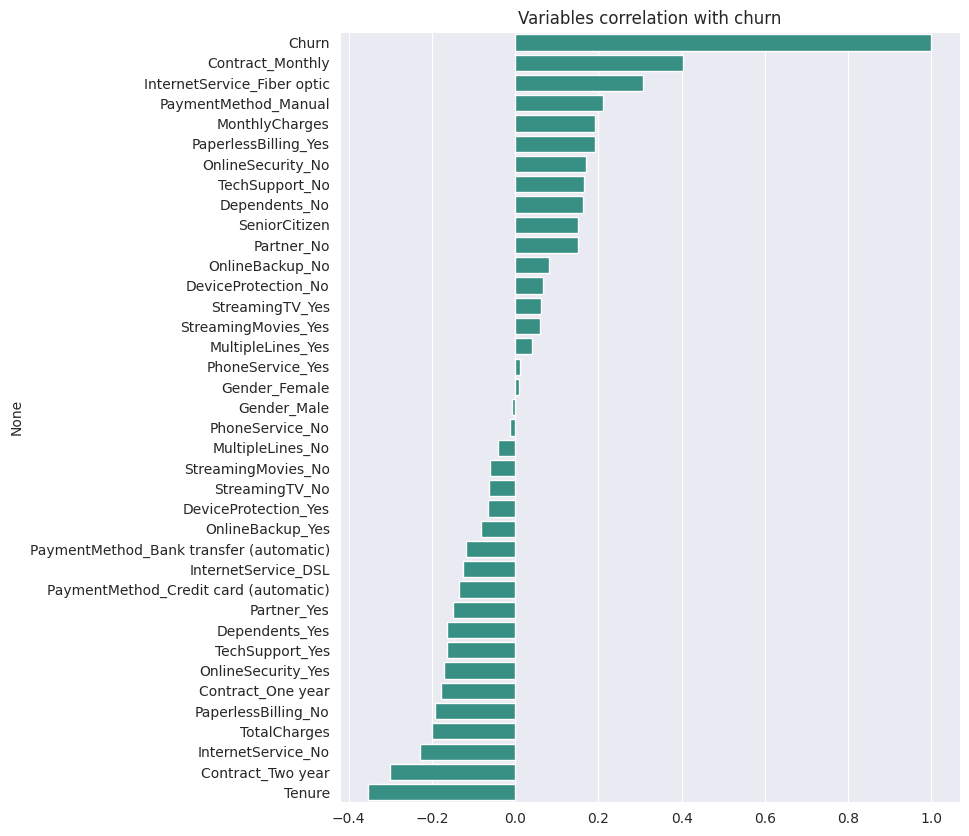

In [13]:
#Get Correlation of "Churn" with other variables:

fig = plt.figure(figsize=(8,10))
corr_plot = df_dummies.corr()['Churn']

head = corr_plot.sort_values(ascending=False)

sns.barplot(x=head.values, y=head.index,color=single_color)
plt.title("Variables correlation with churn")
plt.show()

**Description:** From the chart, we can see the highly correlated variables with the churn. Churn is seemed to be positively correlated with month-to-month contract, absence of offline security, and the absence of tech support. The negatively correlated variables are tenure (length of time that a customer remains subscribed to the service.), customers with two year contract, and have online backups but no internet service.

## 1. Demographics
Let's first undestand the personal information of our telco customers

In [14]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


### a) Gender distribution

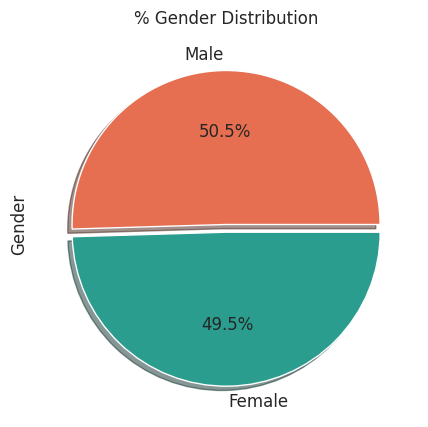

In [15]:
fig = plt.figure(facecolor='white')
explode=[0,0.05]
ax = (df['Gender'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = df['Gender'].value_counts().index,figsize =(5,5), fontsize = 12,colors=dual_color,shadow=True,explode=explode)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Gender',fontsize = 12)
ax.set_title('% Gender Distribution', fontsize = 12)

plt.show()

**Description:** From the chart, we can see that there is a very low differences between the users for both genders with a very slighlty more male users rather than females.

### b) Age distribution

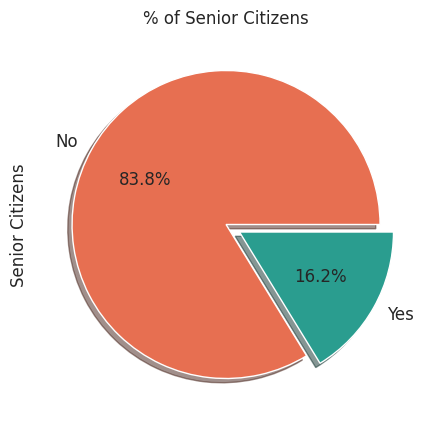

In [16]:
fig = plt.figure(facecolor='white')
explode=[0,0.1]
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12,colors=dual_color,shadow=True,explode=explode)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

plt.show()

**Description:** The majority of the telco users are among the youger citizens with only 16.2% of the users are senior citizens.

### c) Partner and dependent status

<Figure size 640x480 with 0 Axes>

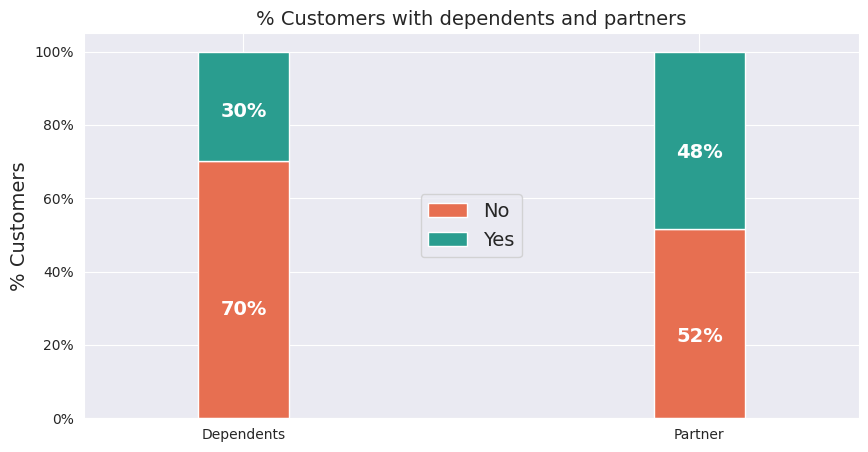

In [17]:
fig = plt.figure(facecolor='white')

df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=dual_color,figsize=(10,5),rot = 0,width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**Description:** Only around half of the customers have a partner, and only about a third of the overall customers have dependents.

## 2. Customer telco account information
Let's first undestand the personal information of our telco customers

### a) Tenure

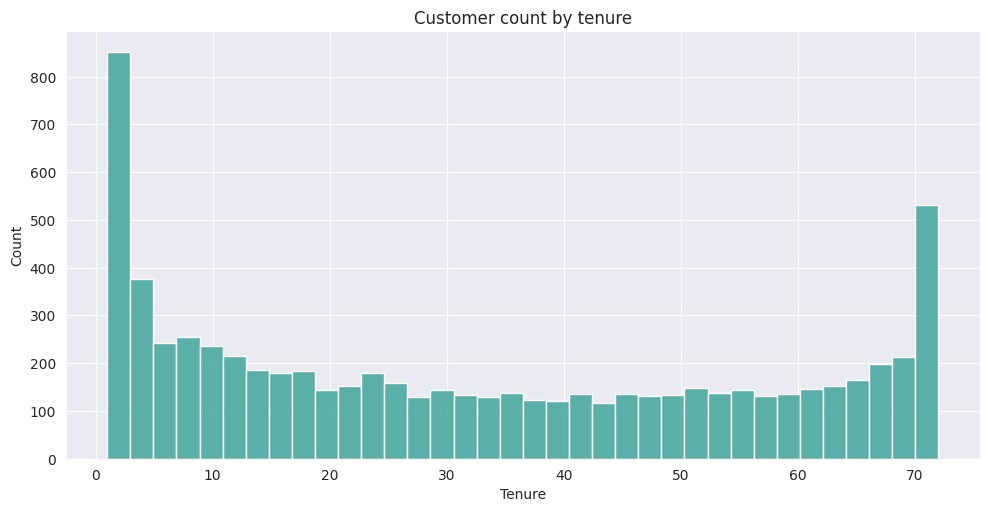

In [18]:
#Get Correlation of "Churn" with other variables:

sns.displot(data=df, x="Tenure",bins=int(180/5),height=5,aspect=2, color=single_color)
plt.title('Customer count by tenure')
plt.show()

**Description:** Looking at the histogram above, we can see that many consumers have only been with the telco service for just a month. There are also many cusstomers use their service for over 72 months. This could be due to the fact that each customer has a different contract. As a result, depending on the contract, clients may find it simpler or more difficult to stay with or quit the telecom firm.

### b) Contracts

/tmp/ipython-input-2643132244.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Contract", data=df,palette=triple_color)


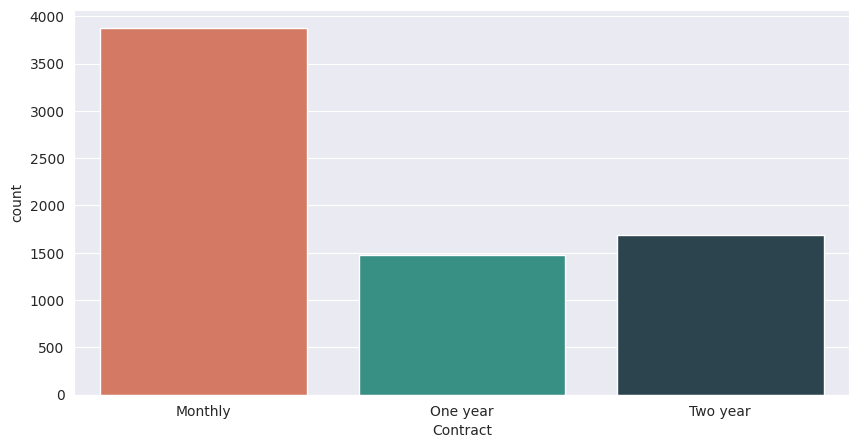

In [19]:
fig = plt.figure(figsize=(10,5),facecolor='white')
sns.countplot(x="Contract", data=df,palette=triple_color)
plt.show()

**Description:** As can be seen from this graph, the majority of consumers are on a month-to-month basis. The 1 year and 2 year contracts have a near equal number of consumers. Just out of curiosity, let's see the tenure of the customers based on their contract type.

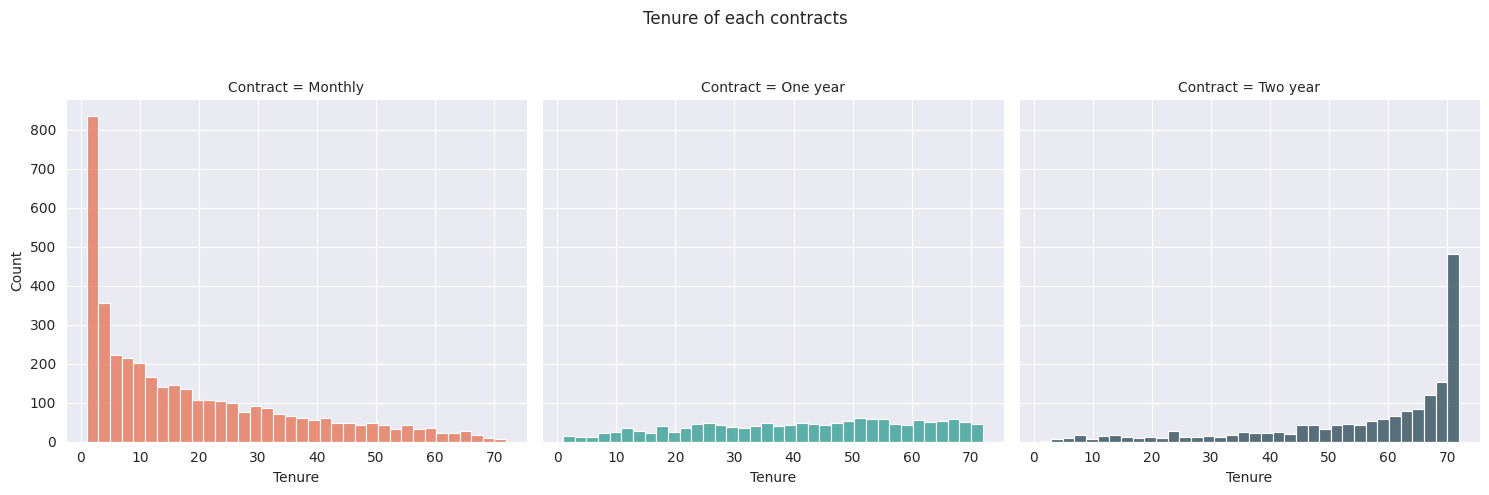

In [20]:
d = {'color': triple_color}
g = sns.FacetGrid(df, col="Contract",palette=triple_color,height=5, aspect=1,hue_kws=d, hue='Contract')
g.map(sns.histplot, "Tenure",bins=int(180/5),color=single_color)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Tenure of each contracts')
plt.show()

**Description:** Surprisingly, most monthly contracts are for 1-2 months, although two-year contracts are typically for 70 months. This demonstrates that customers who sign a lengthier contract are more loyal to the company and are more likely to stay with it for a longer time. This is also what we noticed in the churn rate correlation chart previously.

## 3. Distribution of customer's telco service
Let's see what are the services favored by the telco customers.

In [21]:
# View columns names to identify services
df.columns.values

array(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [22]:
#Create list of services
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',\
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

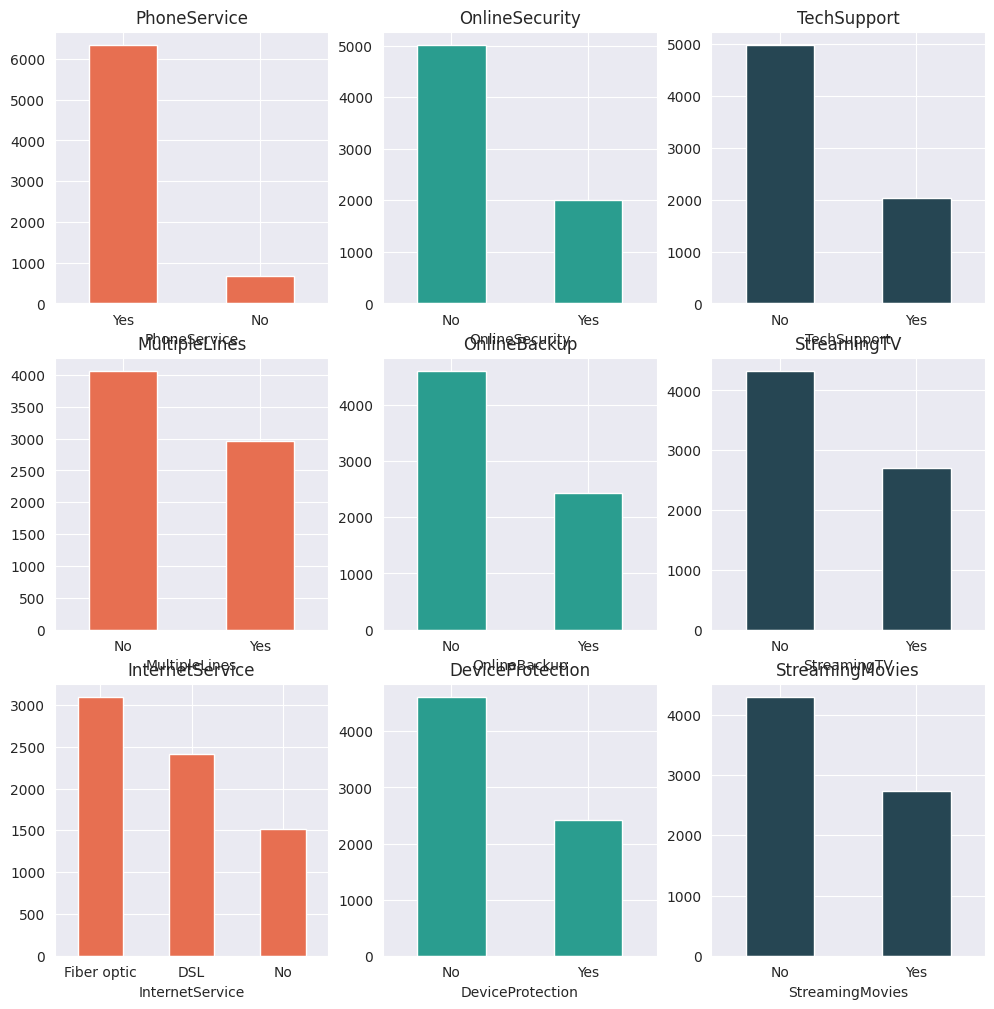

In [23]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(12,12),facecolor='white')
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind='bar',ax=axes[i,0],rot=0,color=triple_color[0])

    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind='bar',ax=axes[i-3,1],rot=0,color=triple_color[1])

    elif i < 9:
        ax = df[item].value_counts().plot(kind='bar',ax=axes[i-6,2],rot=0,color=triple_color[2])
    ax.set_title(item)

## 4. Correlation between monthly and total charges

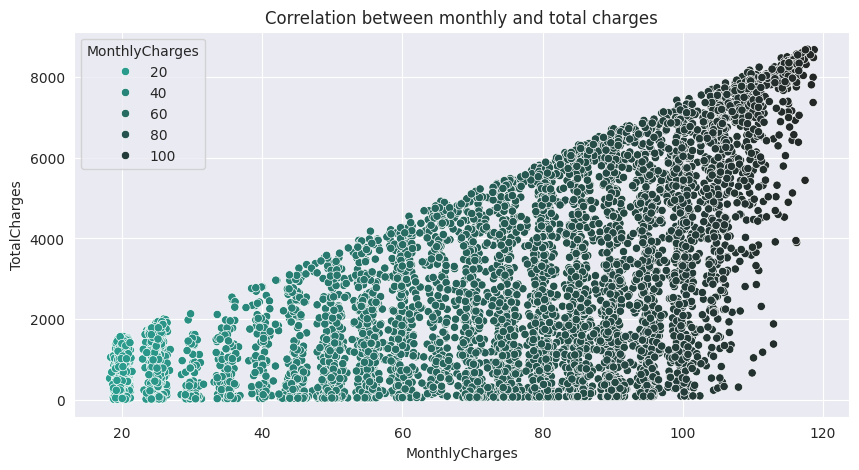

In [24]:
fig=plt.figure(figsize=(10,5),facecolor='white')
plt.title('Correlation between monthly and total charges')
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges",hue='MonthlyCharges',palette=sns.dark_palette(triple_color[1], reverse=True, as_cmap=True))
plt.show()

**Description:** From the scatterplot, the monthly bill for a customer rises as well as the total charges.

## 5. Churn predictor variable

### a) Overall churn rate

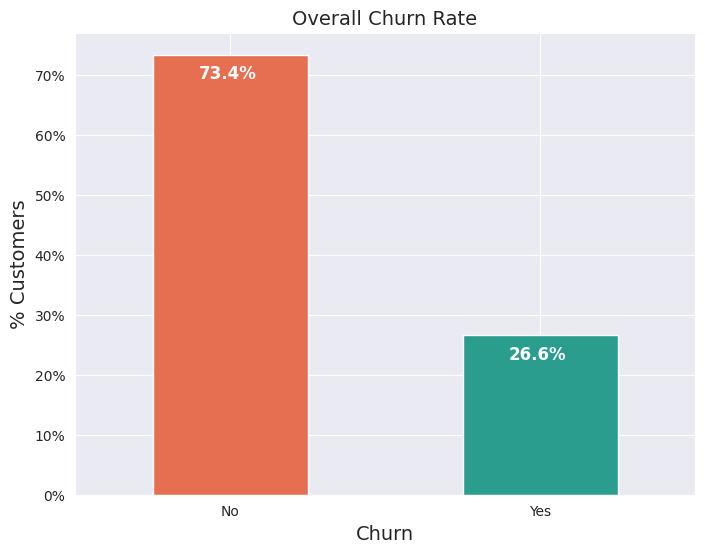

In [25]:
ax = (df['Churn'].value_counts()*100.0 /len(df))\
.plot(kind='bar',
      stacked = True,
      rot = 0,color = dual_color,
      figsize = (8,6)
     )

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Overall Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold') # Removed 'size = 14' to resolve the TypeError

**Description:** From the chart, we can see that the churn rate is 26.6%. We would expect a significant majority of customers to not churn, hence the data is clearly skewed. This is wise to note during modelling because skewness might results in a lot of false negatives.

### b) Churn rate by tenure, seniority, contract type, monthly charges and total charges

#### i) Churn vs Tenure

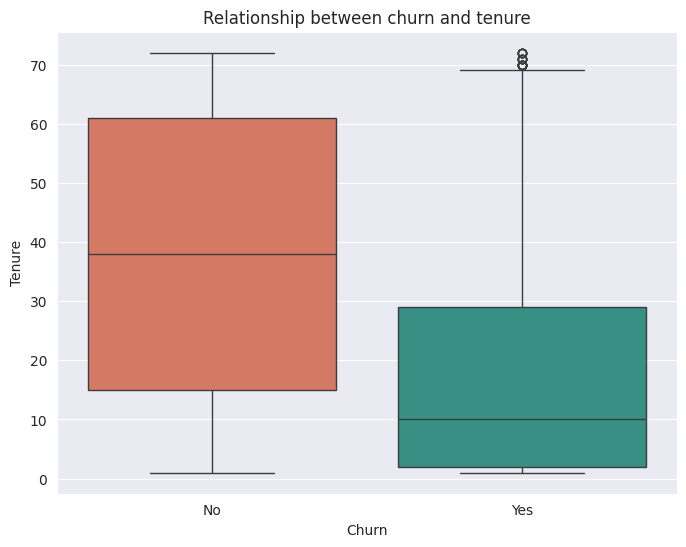

In [26]:
fig=plt.figure(figsize=(8,6),facecolor='white')
plt.title('Relationship between churn and tenure')
sns.boxplot(x = df['Churn'], y = df['Tenure'], hue = df['Churn'], palette=dual_color, legend=False)
plt.show()

**Description:** Customers who do not churn, as seen in the graph below, tends to stay with the telco operator for a longer period of time.

#### ii) Churn by Contract Type

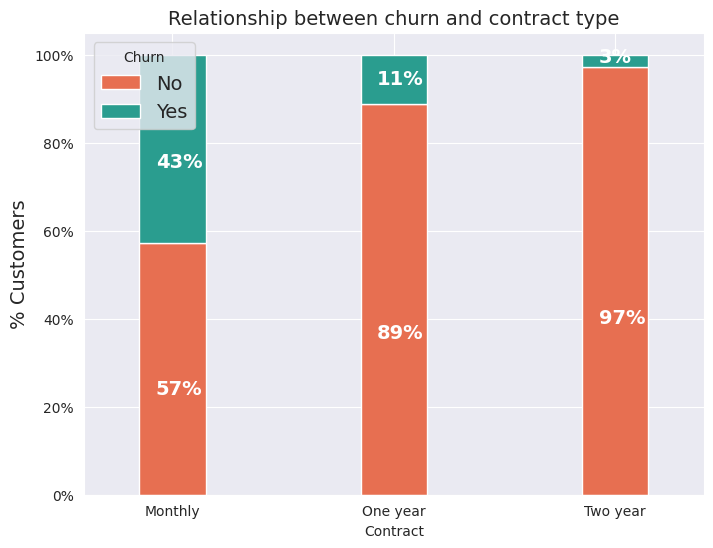

In [27]:
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum())\
.T.plot(kind='bar',
        width = 0.3,
        stacked = True,
        rot = 0,
        figsize = (8,6),
        color = dual_color
       )

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Relationship between churn and contract type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height),
                (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'bold',
                size = 14)

**Description:** The chart above shows that the telco users with month-to-month contracts tends to have  higher churn rate than the other contracts. This is quite similar from the results obtain in the correlation between variables chart.

#### iii) Churn by Seniority

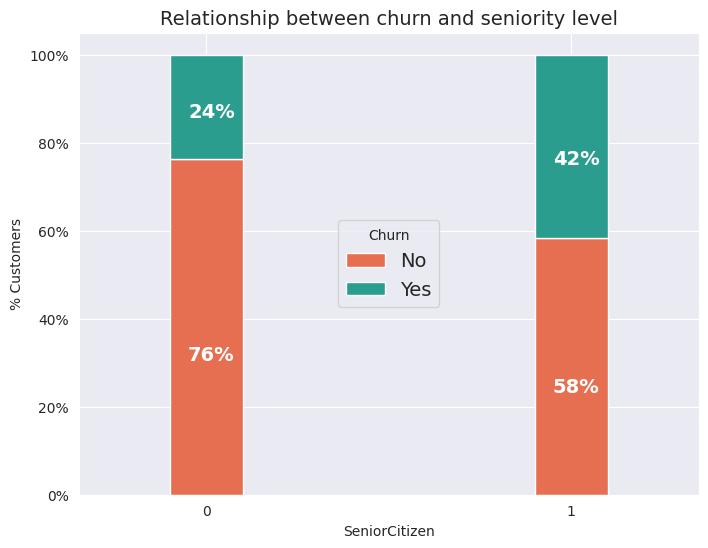

In [28]:
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum())\
.T.plot(kind='bar',
        width = 0.2,
        stacked = True,
        rot = 0,
        figsize = (8,6),
        color = dual_color
       )

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Relationship between churn and seniority level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height),
                (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'bold',size =14)

**Description:** The chart above shows that telco users from the senior citizens group have nearly twice the churn rate of younger citizens.

#### iv) Churn by Monthly Charges

/tmp/ipython-input-653402010.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
/tmp/ipython-input-653402010.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],


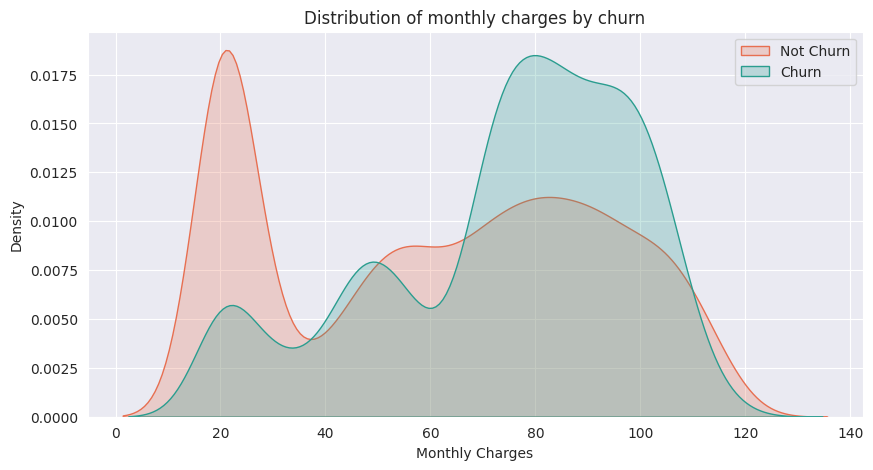

In [29]:
fig = plt.figure(figsize=(10,5))
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color=dual_color[0],
                shade = True)

sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                color=dual_color[1],
                shade= True)

plt.legend(["Not Churn","Churn"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Monthly Charges')
plt.title('Distribution of monthly charges by churn')
plt.show()

**Description:** From the plot above,we can observe a high churn rate when the monthly charge is high and lower when it is cheaper.

#### v) Churn by Total Charges

/tmp/ipython-input-74750517.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
/tmp/ipython-input-74750517.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],


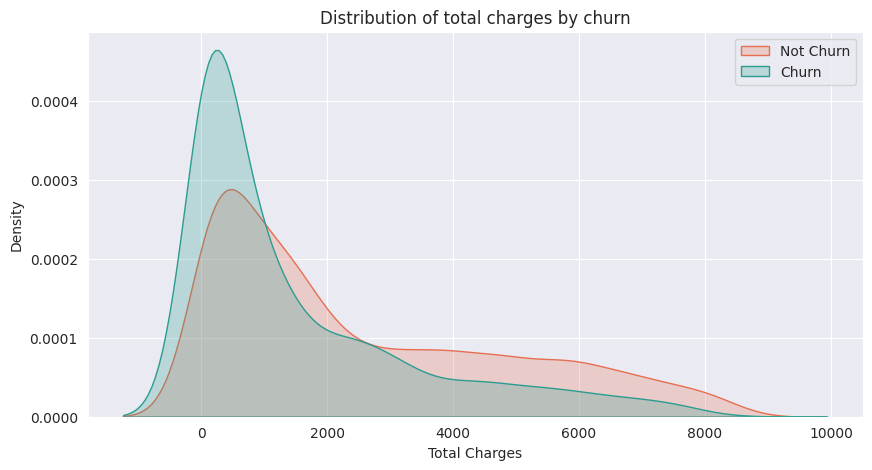

In [30]:
fig = plt.figure(figsize=(10,5))
sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color=dual_color[0],
                shade = True)

sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                color=dual_color[1],
                shade = True)

plt.legend(["Not Churn","Churn"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Total Charges')
plt.title('Distribution of total charges by churn')
plt.show()

**Description:** The chart shows a higher chun rate on the lower values of total charges. Possibly the customers chose to pay off their bill before stopping to use the telco service.

# Churn prediction model
In this section, we will create a churn prediction model using Logistic Regression, Support Vector Machine, and Random Forest.

## Training

In [31]:
# seperate label and features
y = df_dummies.Churn
X = df_dummies.drop('Churn', axis=1)

From the dataset, we can see large differences between their ranges for each columns. These differences in the ranges of initial features causes trouble to many machine learning models. Here, we will use MinMax scaler to scale all variables from 0 to 1.

In [32]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler, StandardScaler
features = X.columns.values
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [33]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

We know from out EDA that the data is skewed causing an imbalance. We can oversample the minority class using SMOTE. This is done to avoid a lot of false positives from occuring.

In [34]:
# oversampling the data
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [35]:
# Split the oversampled data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [36]:
y_train.value_counts()

,count
Churn,
0,4132
1,4128


In [37]:
# Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [38]:
#Logistic Regression model
lr_model=LogisticRegression(C=10).fit(X_train,y_train)

#Support Vector Machine
svm_model=SVC(C=1.5,kernel='linear').fit(X_train,y_train)

# Neural Network
from sklearn.neural_network import MLPClassifier
nn_model=MLPClassifier(activation='logistic',
                       alpha=0.009,
                       validation_fraction=0.2).fit(X_train,y_train)

#print model scores
print('Logistic Regression Accuracy: {:.2f}%'.format(lr_model.score(X_test,y_test)*100))
print('Support Vector Machine Accuracy: {:.2f}%'.format(svm_model.score(X_test,y_test)*100))
print('Neural Network Accuracy: {:.2f}%'.format(nn_model.score(X_test,y_test)*100))

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Logistic Regression Accuracy: 77.49%
Support Vector Machine Accuracy: 76.67%
Neural Network Accuracy: 78.51%


In [39]:
from sklearn.metrics import f1_score as f1
#make predictions
lr_pred = lr_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
nn_pred = nn_model.predict(X_test)

#Print model's prediction f1 score
print('Logistic Regression Accuracy: {:.2f}%'.format(f1(y_test, lr_pred)*100))
print('Support Vector Machine Accuracy: {:.2f}%'.format(f1(y_test, svm_pred)*100))
print('Neural Network Accuracy: {:.2f}%'.format(f1(y_test, nn_pred)*100))

Logistic Regression Accuracy: 78.28%
Support Vector Machine Accuracy: 77.54%
Neural Network Accuracy: 79.02%


## Evaluation

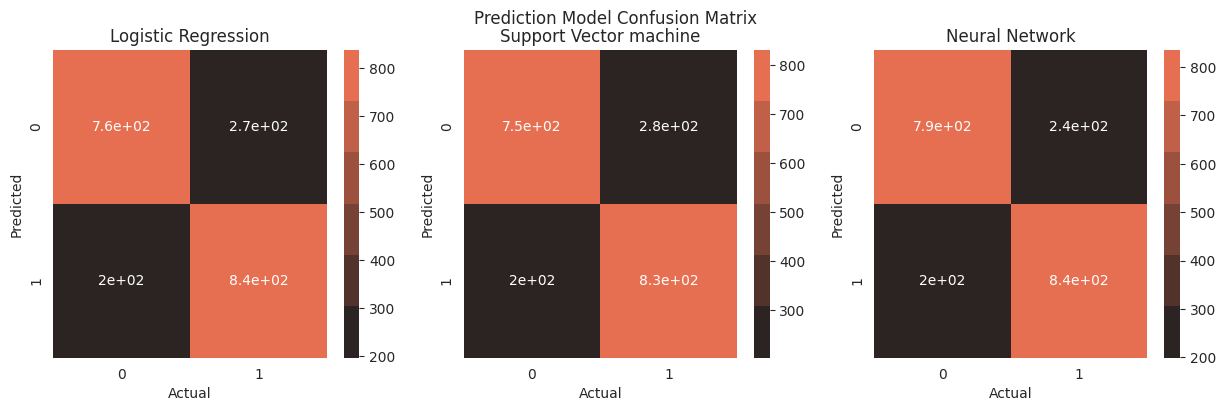

In [40]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig, axs = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(15, 4)

lr_cmat = confusion_matrix(y_test,lr_pred)
svm_cmat = confusion_matrix(y_test,svm_pred)
nn_cmat = confusion_matrix(y_test,nn_pred)

fig.suptitle("Prediction Model Confusion Matrix")

sns.heatmap(lr_cmat,annot=True,ax=axs[0],cmap=sns.dark_palette(triple_color[0]))
axs[0].set_title('Logistic Regression')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

sns.heatmap(svm_cmat,annot=True,ax=axs[1],cmap=sns.dark_palette(triple_color[0]))
axs[1].set_title('Support Vector machine')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

sns.heatmap(nn_cmat,annot=True,ax=axs[2],cmap=sns.dark_palette(triple_color[0]))
axs[2].set_title('Neural Network')
axs[2].set_xlabel('Actual')
axs[2].set_ylabel('Predicted')

plt.show()

**Description:** From the confusion matrix, there are some false positives albeit significantly lower. I've made another churn prediction model before this one and the false positives are way to high.

In [41]:
from sklearn.metrics import classification_report

true = y_test
target_names = list(['no churn','churn'])

lr_clf_report = classification_report(true,
                                   lr_pred,
                                   target_names=target_names,
                                   output_dict=True)

svm_clf_report = classification_report(true,
                                   svm_pred,
                                   target_names=target_names,
                                   output_dict=True)

nn_clf_report = classification_report(true,
                                   nn_pred,
                                   target_names=target_names,
                                   output_dict=True)

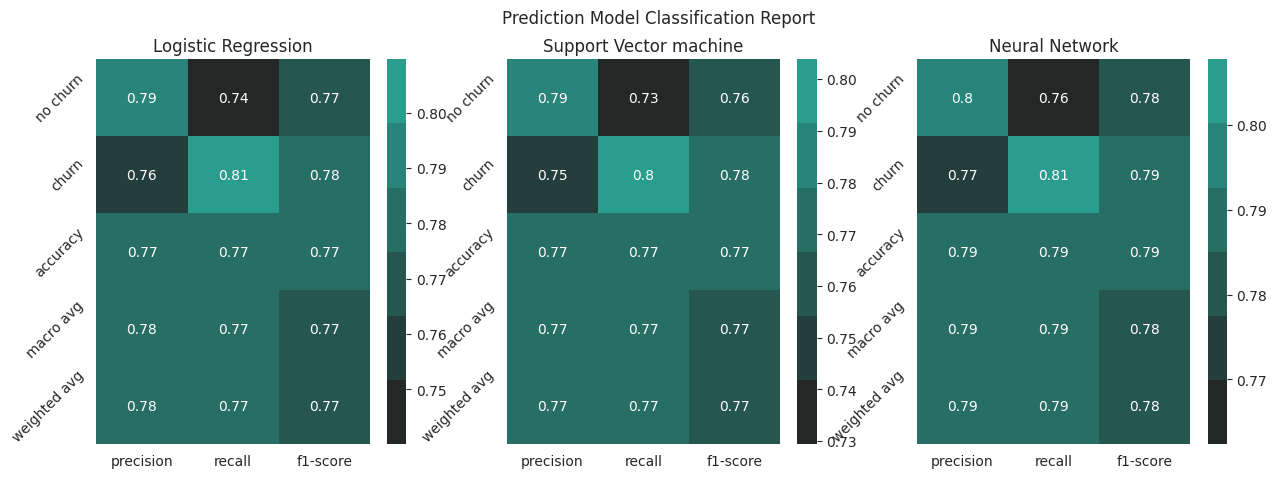

In [42]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(15, 5)

fig.suptitle("Prediction Model Classification Report")

sns.heatmap(pd.DataFrame(lr_clf_report).iloc[:-1, :].T, annot=True,ax=axs[0],cmap=sns.dark_palette(triple_color[1]))
axs[0].set_title('Logistic Regression')
axs[0].tick_params(labelrotation=45,axis='y')


sns.heatmap(pd.DataFrame(svm_clf_report).iloc[:-1, :].T, annot=True,ax=axs[1],cmap=sns.dark_palette(triple_color[1]))
axs[1].set_title('Support Vector machine')
axs[1].tick_params(labelrotation=45,axis='y')


sns.heatmap(pd.DataFrame(nn_clf_report).iloc[:-1, :].T, annot=True,ax=axs[2],cmap=sns.dark_palette(triple_color[1]))
axs[2].set_title('Neural Network')
axs[2].tick_params(labelrotation=45,axis='y')

plt.show()

**Description:** At a glance, we can see that our Support Vector Machine model works better than the other two models by having better scores overall.

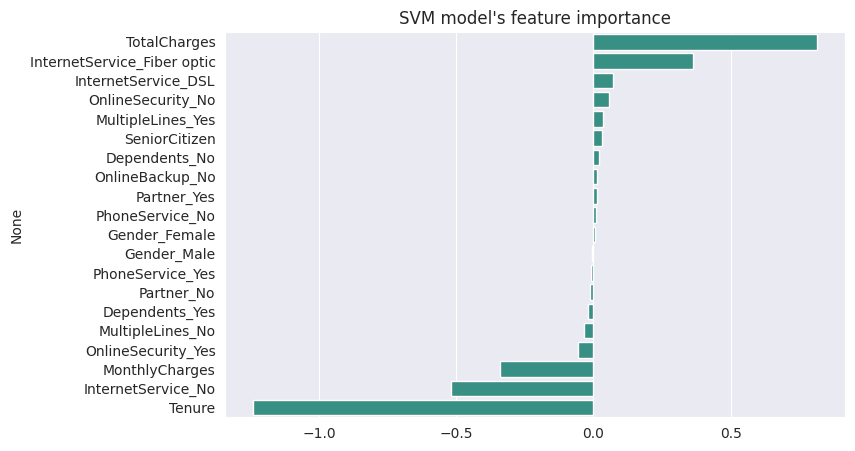

In [43]:
fig = plt.figure(figsize=(8,5))
weights = pd.Series(svm_model.coef_[0],
                 index=X.columns.values)[:20]

head = weights.sort_values(ascending=False)

sns.barplot(x=head.values, y=head.index,color=single_color)
plt.title("SVM model's feature importance")
plt.show()

**Description:** Some variables have a negative relationship with our anticipated variable (Churn), whereas others have a positive relationship. A negative relationship indicates that the likelihood of churn decreases as the variable is increased. Let's have a look at some of the more intriguing features:

* The thing I found interesting is that telco users with Fiber Optic internet service are more likely to churn rather than DSL. This is intriguing because, despite the fact that fibre optic services are quicker, customers are more likely to churn as a result. I believe we need to go deeper to understand why this is happening.


* Quite similar to our correaltion between variables plot in our EDA, we can see that tenure and two year contracts, and monthly charges contributed to lower rates of churn. Having longer contracts possibly cause increased loyalty from the telco customers. Monthly charges cause lower churn rates possibly the telco users are in a country where salary are mostly given monthly and they have less stress when paying telco bills since they currently have money for it.

In [44]:
# Install Gradio if not already installed
!pip install gradio

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np

# Assuming `scaler`, `svm_model`, and `features` are globally available after previous execution

def predict_churn(senior_citizen_input, tenure_input, monthly_charges_input, total_charges_input,
                  gender_input, partner_input, dependents_input, phone_service_input, multiple_lines_input,
                  internet_service_input, online_security_input, online_backup_input, device_protection_input,
                  tech_support_input, streaming_tv_input, streaming_movies_input, contract_input,
                  paperless_billing_input, payment_method_input):

    # Create a dictionary to hold input data for a single row
    # Initialize all features (based on the global `features` list) to 0
    input_dict = {col: 0 for col in features}

    # Fill in numerical features directly
    input_dict['SeniorCitizen'] = 1 if senior_citizen_input == 'Yes' else 0
    input_dict['Tenure'] = tenure_input
    input_dict['MonthlyCharges'] = monthly_charges_input
    input_dict['TotalCharges'] = total_charges_input

    # Fill in one-hot encoded features based on user selections
    if gender_input == 'Female':
        input_dict['Gender_Female'] = 1
    else: # Male
        input_dict['Gender_Male'] = 1

    if partner_input == 'Yes':
        input_dict['Partner_Yes'] = 1
    else: # No
        input_dict['Partner_No'] = 1

    if dependents_input == 'Yes':
        input_dict['Dependents_Yes'] = 1
    else: # No
        input_dict['Dependents_No'] = 1

    if phone_service_input == 'Yes':
        input_dict['PhoneService_Yes'] = 1
    else: # No
        input_dict['PhoneService_No'] = 1

    if multiple_lines_input == 'Yes':
        input_dict['MultipleLines_Yes'] = 1
    elif multiple_lines_input == 'No':
        input_dict['MultipleLines_No'] = 1
    # If 'No phone service', then both MultipleLines_No and MultipleLines_Yes remain 0, which is correct based on features array.

    if internet_service_input == 'DSL':
        input_dict['InternetService_DSL'] = 1
    elif internet_service_input == 'Fiber optic':
        input_dict['InternetService_Fiber optic'] = 1
    else: # No
        input_dict['InternetService_No'] = 1
        # If no internet service, internet-dependent services are 'No internet service'.
        # Their OHE columns (e.g., OnlineSecurity_No/Yes) should remain 0, which is handled by default initialization.

    if online_security_input == 'Yes':
        input_dict['OnlineSecurity_Yes'] = 1
    elif online_security_input == 'No':
        input_dict['OnlineSecurity_No'] = 1

    if online_backup_input == 'Yes':
        input_dict['OnlineBackup_Yes'] = 1
    elif online_backup_input == 'No':
        input_dict['OnlineBackup_No'] = 1

    if device_protection_input == 'Yes':
        input_dict['DeviceProtection_Yes'] = 1
    elif device_protection_input == 'No':
        input_dict['DeviceProtection_No'] = 1

    if tech_support_input == 'Yes':
        input_dict['TechSupport_Yes'] = 1
    elif tech_support_input == 'No':
        input_dict['TechSupport_No'] = 1

    if streaming_tv_input == 'Yes':
        input_dict['StreamingTV_Yes'] = 1
    elif streaming_tv_input == 'No':
        input_dict['StreamingTV_No'] = 1

    if streaming_movies_input == 'Yes':
        input_dict['StreamingMovies_Yes'] = 1
    elif streaming_movies_input == 'No':
        input_dict['StreamingMovies_No'] = 1

    if contract_input == 'Monthly':
        input_dict['Contract_Monthly'] = 1
    elif contract_input == 'One year':
        input_dict['Contract_One year'] = 1
    else: # Two year
        input_dict['Contract_Two year'] = 1

    if paperless_billing_input == 'Yes':
        input_dict['PaperlessBilling_Yes'] = 1
    else: # No
        input_dict['PaperlessBilling_No'] = 1

    if payment_method_input == 'Electronic check':
        input_dict['PaymentMethod_Electronic check'] = 1
    elif payment_method_input == 'Mailed check':
        input_dict['PaymentMethod_Mailed check'] = 1
    elif payment_method_input == 'Bank transfer (automatic)':
        input_dict['PaymentMethod_Bank transfer (automatic)'] = 1
    else: # Credit card (automatic)
        input_dict['PaymentMethod_Credit card (automatic)'] = 1

    # Convert the dictionary to a DataFrame, ensuring correct column order as per `features`
    input_df_processed = pd.DataFrame([input_dict], columns=features)

    # Scale the numerical features using the *trained* scaler
    numerical_cols_to_scale = ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']
    input_df_processed[numerical_cols_to_scale] = scaler.transform(input_df_processed[numerical_cols_to_scale])

    # Make prediction using the best model (svm_model)
    prediction = svm_model.predict(input_df_processed)[0] # Get the single prediction result

    # Interpret prediction
    if prediction == 1:
        return "Prediction: Customer is likely to CHURN"
    else:
        return "Prediction: Customer is likely to STAY"

# Define Gradio input components
inputs = [
    gr.Radio(['No', 'Yes'], label='Senior Citizen'),
    gr.Slider(minimum=1, maximum=72, step=1, label='Tenure (months)', value=12),
    gr.Number(label='Monthly Charges', value=50.0),
    gr.Number(label='Total Charges', value=600.0),
    gr.Radio(['Female', 'Male'], label='Gender', value='Female'),
    gr.Radio(['Yes', 'No'], label='Partner', value='No'),
    gr.Radio(['Yes', 'No'], label='Dependents', value='No'),
    gr.Radio(['Yes', 'No'], label='Phone Service', value='Yes'),
    gr.Radio(['No phone service', 'No', 'Yes'], label='Multiple Lines', value='No'),
    gr.Radio(['DSL', 'Fiber optic', 'No'], label='Internet Service', value='DSL'),
    gr.Radio(['No internet service', 'No', 'Yes'], label='Online Security', value='No'),
    gr.Radio(['No internet service', 'No', 'Yes'], label='Online Backup', value='No'),
    gr.Radio(['No internet service', 'No', 'Yes'], label='Device Protection', value='No'),
    gr.Radio(['No internet service', 'No', 'Yes'], label='Tech Support', value='No'),
    gr.Radio(['No internet service', 'No', 'Yes'], label='Streaming TV', value='No'),
    gr.Radio(['No internet service', 'No', 'Yes'], label='Streaming Movies', value='No'),
    gr.Radio(['Monthly', 'One year', 'Two year'], label='Contract', value='Monthly'),
    gr.Radio(['Yes', 'No'], label='Paperless Billing', value='Yes'),
    gr.Radio(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], label='Payment Method', value='Electronic check')
]

output = gr.Textbox(label='Churn Prediction Result')

# Create and launch the Gradio interface with a modern theme
gr.Interface(fn=predict_churn,
             inputs=inputs,
             outputs=output,
             title='Telecom Customer Churn Prediction',
             description='Enter customer details to predict churn likelihood.',
             theme=gr.themes.Soft()).launch(debug=True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://51dd9666e1af859b90.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
